In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

Mirella Glowinska
Dataset source: https://archive.ics.uci.edu/dataset/228/sms+spam+collection

In [ ]:
csv_file_path = '/content/drive/MyDrive/Datasets/SMSSpamCollection'
df = pd.read_csv(csv_file_path, sep='\t', header=None, names=['class', 'message'])
print(df.head())
print()

print(df.describe())
print()

num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_cols}')
print()

print(f'Column names: {df.columns}')
print()


  class                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

       class                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30

Number of rows: 5572
Number of columns: 2

Column names: Index(['class', 'message'], dtype='object')



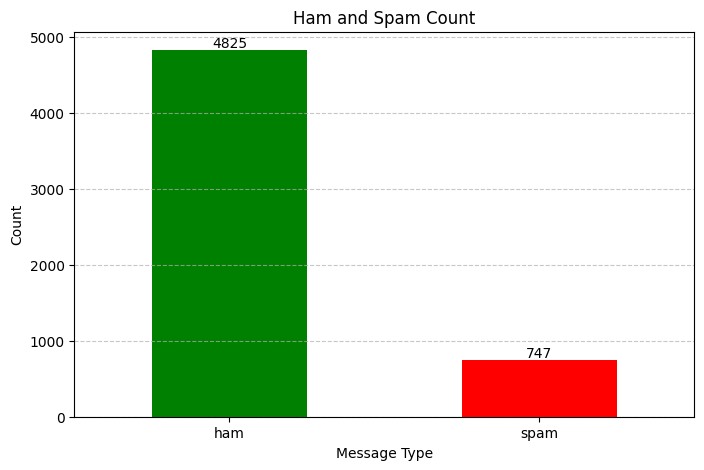

In [ ]:
import matplotlib.pyplot as plt

data = df['class'].value_counts()
plt.figure(figsize=(8, 5))
patches = data.plot(kind='bar', color=['green', 'red'])
plt.title('Ham and Spam Count')
plt.xlabel('Message Type')
plt.ylabel('Count')
#x label horizontal
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in patches.patches:
    plt.annotate(f'{bar.get_height()}',
    (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
print("Counts of spam and ham before removing duplicates:")
print(df['class'].value_counts())

duplicates = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {duplicates.shape[0]}")
if not duplicates.empty:
    print("Duplicate rows:")
    print(duplicates)

print(f'\nShape of Dataset before drop duplicated Row is: {df.shape}')
df = df.drop_duplicates()
print(f'Shape of Dataset After Drop Duplicated Row is: {df.shape}')

print("\nCounts of spam and ham after removing duplicates:")
print(df['class'].value_counts())


Counts of spam and ham before removing duplicates:
class
ham     4825
spam     747
Name: count, dtype: int64

Number of duplicate rows: 403
Duplicate rows:
     class                                            message
103    ham  As per your request 'Melle Melle (Oru Minnamin...
154    ham  As per your request 'Melle Melle (Oru Minnamin...
207    ham  As I entered my cabin my PA said, '' Happy B'd...
223    ham                             Sorry, I'll call later
326    ham                   No calls..messages..missed calls
...    ...                                                ...
5524  spam  You are awarded a SiPix Digital Camera! call 0...
5535   ham  I know you are thinkin malaria. But relax, chi...
5539   ham                         Just sleeping..and surfing
5553   ham                        Hahaha..use your brain dear
5558   ham                             Sorry, I'll call later

[403 rows x 2 columns]

Shape of Dataset before drop duplicated Row is: (5572, 2)
Shape of Dataset 

In [ ]:
df['class'] = df['class'].replace({'ham': 0, 'spam': 1})

print(df.head())

   class                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


<ipython-input-85-bf63256cb5b1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'ham': 0, 'spam': 1})


Tutorial1: https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial

Tutorial2: https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial

In [ ]:
X = df["message"]
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
vectorizer = TfidfVectorizer()

#transform text into numerical values
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
# shape of X and Y
X_train.shape, X_test.shape

((3463, 6836), (1706, 6836))

https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56 Evaluating a random forest model

In [ ]:
from sklearn.metrics import confusion_matrix
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9724501758499414

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1482
           1       1.00      0.79      0.88       224

    accuracy                           0.97      1706
   macro avg       0.98      0.90      0.93      1706
weighted avg       0.97      0.97      0.97      1706



In [ ]:
confusion_matrix(y_test, y_pred)

array([[1482,    0],
       [  47,  177]])

In [ ]:
#testing
import random

random_index = random.randint(0, X_test.shape[0] - 1)

random_message = df.iloc[y_test.index[random_index]]['message']
#retrieving the Actual Label
actual_label = y_test.iloc[random_index]

random_message_vectorized = vectorizer.transform([random_message])
predicted_label = rf_clf.predict(random_message_vectorized)

print("Random Message:", random_message)
print("Actual Label:", "Spam" if actual_label == 1 else "Ham")
print("Predicted Label:", "Spam" if predicted_label[0] == 1 else "Ham")


Random Message: Must come later.. I normally bathe him in da afternoon mah..
Actual Label: Ham
Predicted Label: Ham


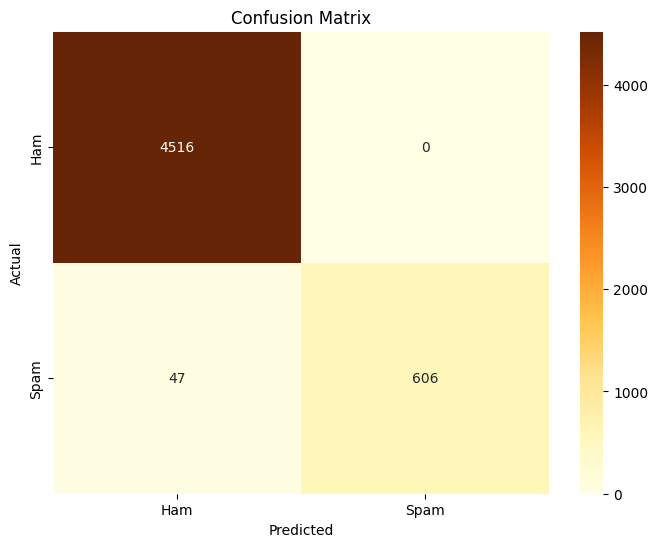

              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99      4516
        Spam       1.00      0.93      0.96       653

    accuracy                           0.99      5169
   macro avg       0.99      0.96      0.98      5169
weighted avg       0.99      0.99      0.99      5169



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

X_test = df[['message']]
y_test = df['class']

y_pred = rf_clf.predict(vectorizer.transform(X_test['message']))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))